In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/IS670_data/Crime.csv', parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
df.head()

<ipython-input-3-85939c4db97e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('/content/drive/MyDrive/IS670_data/Crime.csv', parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
<ipython-input-3-85939c4db97e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('/content/drive/MyDrive/IS670_data/Crime.csv', parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01,0330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01,0415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [ ]:
df.dtypes

,0
DR_NO,int64
Date Rptd,datetime64[ns]
DATE OCC,datetime64[ns]
TIME OCC,object
AREA,int64
AREA NAME,object
Rpt Dist No,int64
Part 1-2,int64
Crm Cd,int64
Crm Cd Desc,object


In [ ]:
crime = [
    'DR_NO',
    'Date Rptd',
    'DATE OCC',
    'TIME OCC',
    'AREA NAME',
    'Crm Cd Desc',
    'Vict Age',
    'Vict Sex',
    'Vict Descent',
    'Weapon Desc',
    'Status Desc',
    'LOCATION'
]

In [ ]:
Crime = df[crime]

9# Display the first few rows of the filtered dataset
Crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,10304468,2020-01-08,2020-01-08,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL
1,190101086,2020-01-02,2020-01-01,0330,Central,BATTERY - SIMPLE ASSAULT,25,M,H,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST
2,200110444,2020-04-14,2020-02-13,1200,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,NaN,Adult Arrest,200 E 6TH ST
3,191501505,2020-01-01,2020-01-01,1730,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,NaN,Invest Cont,5400 CORTEEN PL
4,191921269,2020-01-01,2020-01-01,0415,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,NaN,Invest Cont,14400 TITUS ST


In [ ]:
Crime.isna().sum()

,0
DR_NO,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA NAME,0
Crm Cd Desc,0
Vict Age,0
Vict Sex,98911
Vict Descent,98917
Weapon Desc,494062


In [ ]:
# Make sure to work on a copy if Crime is a slice
Crime = Crime.copy()

# Convert 'TIME OCC' to string and extract hour
Crime.loc[:, "TIME OCC"] = Crime["TIME OCC"].astype(str)
Crime.loc[:, "HOUR OCC"] = Crime["TIME OCC"].str[:2].astype(int)

# Get the hour with the highest frequency of crimes
peak_crime_hour = Crime["HOUR OCC"].value_counts().idxmax()



In [ ]:
Crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
0,10304468,2020-01-08,2020-01-08,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,22
1,190101086,2020-01-02,2020-01-01,0330,Central,BATTERY - SIMPLE ASSAULT,25,M,H,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,3
2,200110444,2020-04-14,2020-02-13,1200,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,NaN,Adult Arrest,200 E 6TH ST,12
3,191501505,2020-01-01,2020-01-01,1730,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,NaN,Invest Cont,5400 CORTEEN PL,17
4,191921269,2020-01-01,2020-01-01,0415,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,NaN,Invest Cont,14400 TITUS ST,4


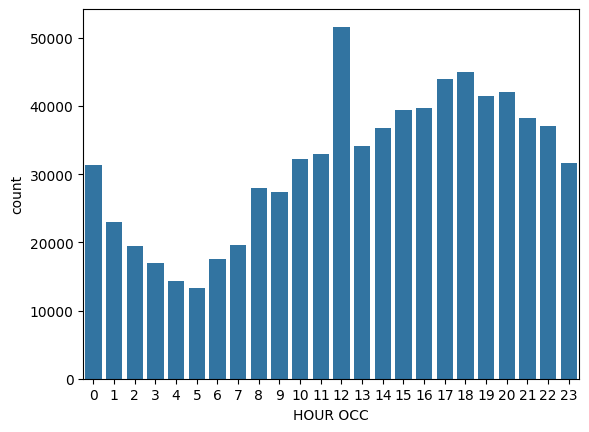

In [ ]:
# Produce a countplot to find the largest frequency of crimes by hour
sns.countplot(data=Crime, x="HOUR OCC")
plt.show()

In [ ]:
## Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?
## Save as a string variable called peak_night_crime_location
# Filter for the night-time hours
# 0 = midnight; 3 = crimes between 3am and 3:59am, i.e., don't include 4
peak_crime_hour = 12
night_time = Crime[Crime["HOUR OCC"].isin([22,23,0,1,2,3])]


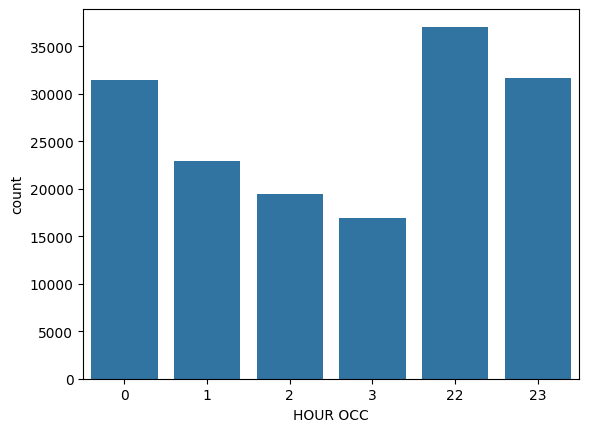

In [ ]:
# Produce a countplot to find the largest frequency of crimes by hour
sns.countplot(data=night_time, x="HOUR OCC")
plt.show()

In [ ]:
# Group by "AREA NAME" and count occurrences, filtering for the largest value and saving the "AREA NAME"
# Midday has the largest volume of crime

peak_night_crime_location = night_time.groupby("AREA NAME",
                                               as_index=False)["HOUR OCC"].count().sort_values("HOUR OCC",
                                                                                               ascending=False).iloc[0]["AREA NAME"]
peak_night_crime_location

'Central'

In [ ]:
# Print the peak night crime location
print(f"The area with the largest volume of night crime is {peak_night_crime_location}")


The area with the largest volume of night crime is Central


In [ ]:

## Identify the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+)
## Save as a pandas Series called victim_ages
# Create bins and labels for victim age ranges
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]



In [ ]:
# Add a new column using pd.cut() to bin values into discrete intervals
Crime["Age Bracket"] = pd.cut(Crime["Vict Age"],
                               bins=age_bins,
                               labels=age_labels)

# Find the category with the largest frequency
victim_ages = Crime["Age Bracket"].value_counts()
print(victim_ages)

Age Bracket
26-34    144370
35-44    126064
45-54     88455
18-25     87493
55-64     63120
65+       42767
0-17      19955
Name: count, dtype: int64


In [ ]:
Crime.dtypes


,0
DR_NO,int64
Date Rptd,datetime64[ns]
DATE OCC,datetime64[ns]
TIME OCC,object
AREA NAME,object
Crm Cd Desc,object
Vict Age,int64
Vict Sex,object
Vict Descent,object
Weapon Desc,object


<ipython-input-25-8ae724283694>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  Crime.resample('Y', on='DATE OCC').size().plot(title='Annual Crime Trends', ylabel='Number of Crimes')
<ipython-input-25-8ae724283694>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Crime[Crime['Year'] == latest_year].resample('M', on='DATE OCC').size().plot(title=f'Monthly Crime Trends in {latest_year}', ylabel='Number of Crimes')


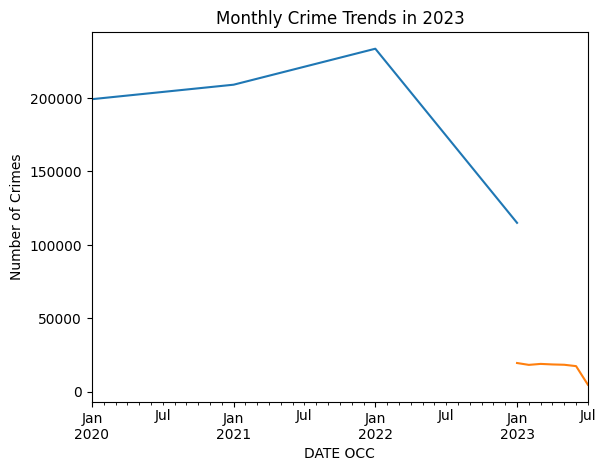

In [ ]:
# Plotting annual crime trends
Crime.resample('Y', on='DATE OCC').size().plot(title='Annual Crime Trends', ylabel='Number of Crimes')

# Plotting monthly crime trends over the latest full year
Crime['Year'] = Crime['DATE OCC'].dt.year
latest_year = Crime['Year'].max()
Crime[Crime['Year'] == latest_year].resample('M', on='DATE OCC').size().plot(title=f'Monthly Crime Trends in {latest_year}', ylabel='Number of Crimes')
plt.show()


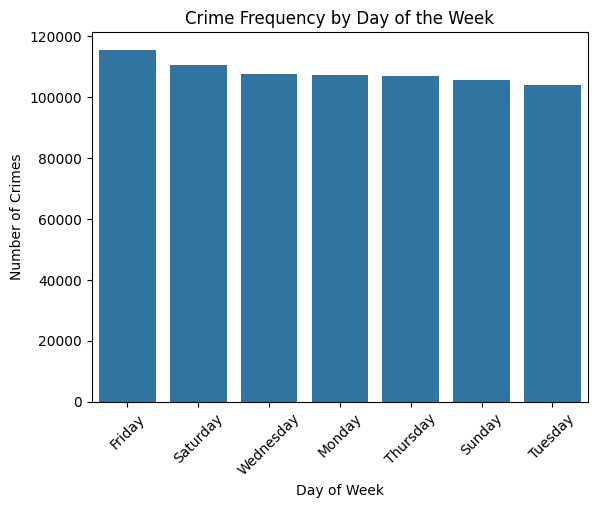

In [ ]:
# Adding a day of the week column
Crime['Day of Week'] = Crime['DATE OCC'].dt.day_name()

# Counting crimes by day of the week
weekday_crimes = Crime['Day of Week'].value_counts()

# Plotting
sns.barplot(x=weekday_crimes.index, y=weekday_crimes.values)
plt.title('Crime Frequency by Day of the Week')
plt.ylabel('Number of Crimes')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.show()


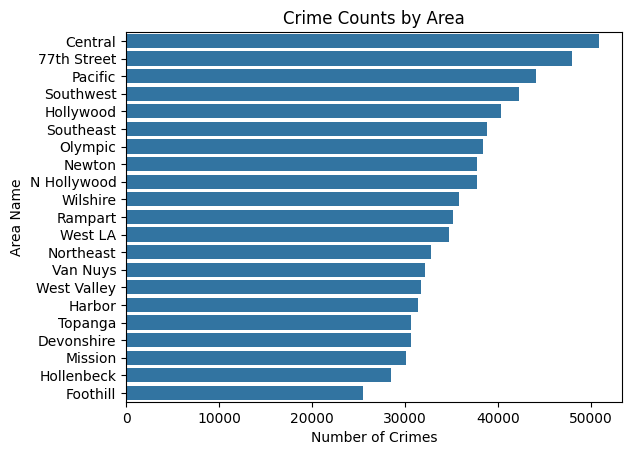

In [ ]:
# Frequency of crimes by area
area_crime_counts = Crime['AREA NAME'].value_counts()

# Plotting
sns.barplot(y=area_crime_counts.index, x=area_crime_counts.values)
plt.title('Crime Counts by Area')
plt.xlabel('Number of Crimes')
plt.ylabel('Area Name')
plt.show()


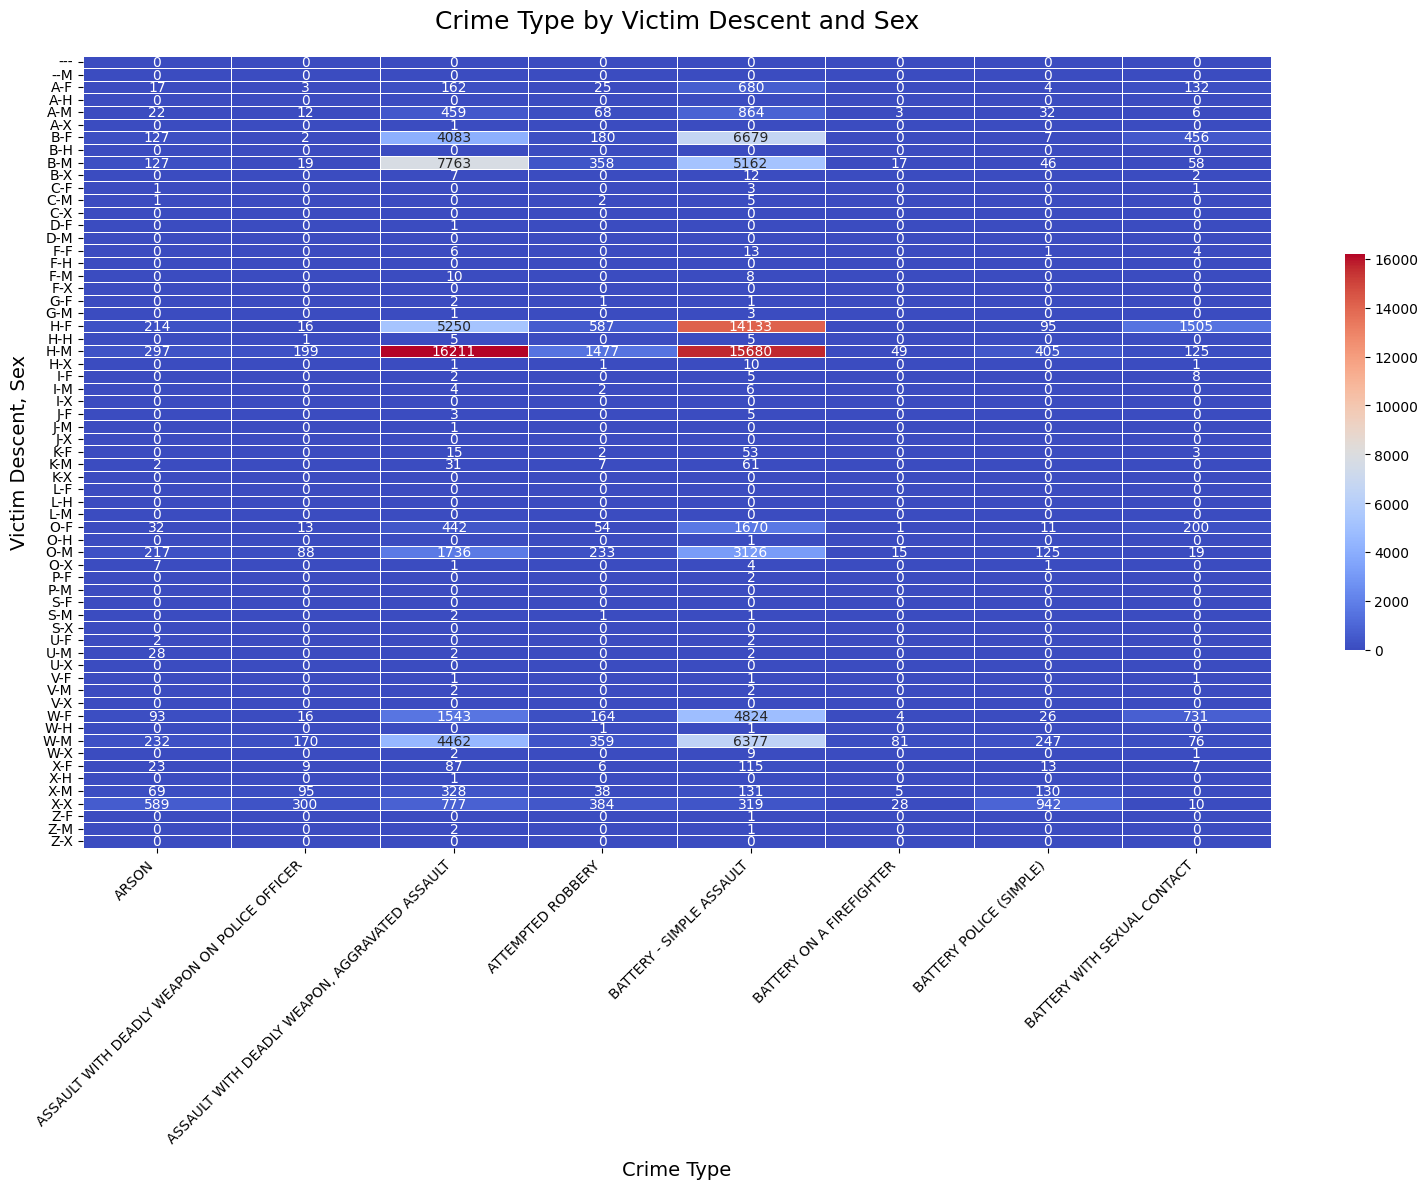

In [ ]:
# Crosstab
victim_demographics = pd.crosstab(
    index=[Crime['Vict Descent'], Crime['Vict Sex']],
    columns=Crime['Crm Cd Desc']
)

# Choose a manageable subset of crime types
subset_crime_types = victim_demographics.columns[:8]  # Fewer columns for clarity

plt.figure(figsize=(16, 12))  # Larger size for better readability

sns.heatmap(
    victim_demographics[subset_crime_types],
    annot=True,
    fmt='d',
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={"shrink": 0.5}
)

# Improve label readability
plt.title('Crime Type by Victim Descent and Sex', fontsize=18, pad=20)
plt.xlabel('Crime Type', fontsize=14, labelpad=10)
plt.ylabel('Victim Descent, Sex', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()


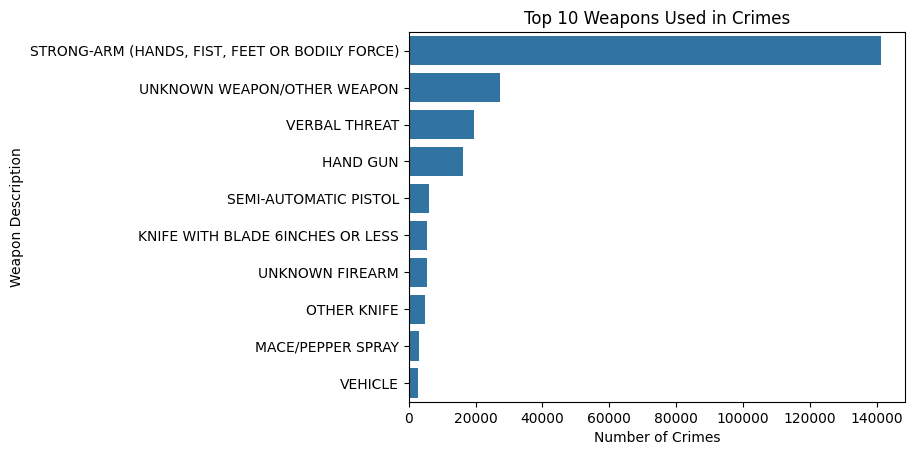

In [ ]:
# Count of crimes by weapon type
weapon_crimes = Crime['Weapon Desc'].value_counts()

# Plotting the top 10 weapons used in crimes
top_weapons = weapon_crimes.head(10)
sns.barplot(y=top_weapons.index, x=top_weapons.values)
plt.title('Top 10 Weapons Used in Crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('Weapon Description')
plt.show()


In [ ]:
# You might first need to map crime descriptions to a 'Severity' category
severity_mapping = {
    'ASSAULT': 'Violent',
    'BURGLARY': 'Property',
    'THEFT': 'Property',
    # Add more mappings based on actual crime descriptions
}

Crime['Severity'] = Crime['Crm Cd Desc'].map(severity_mapping)

# Analyze crime severity trends
severity_counts = Crime['Severity'].value_counts()


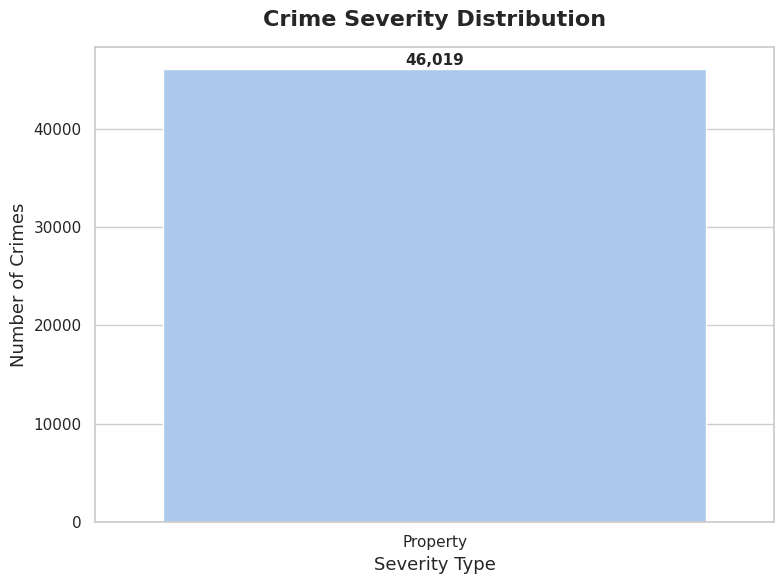

In [ ]:
# Set Seaborn theme
sns.set(style='whitegrid', palette='pastel')

# Prepare severity counts
severity_counts = Crime['Severity'].value_counts()

# Create figure
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=severity_counts.index, y=severity_counts.values)

# Title and labels
plt.title('Crime Severity Distribution', fontsize=16, weight='bold', pad=15)
plt.xlabel('Severity Type', fontsize=13)
plt.ylabel('Number of Crimes', fontsize=13)

# Show values on top of bars
for i, val in enumerate(severity_counts.values):
    ax.text(i, val + 500, f'{val:,}', ha='center', fontsize=11, fontweight='bold')

# Rotate x-axis labels if needed
plt.xticks(rotation=0)

# Final layout
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Encode categorical variables
le_area = LabelEncoder()
le_crime = LabelEncoder()

Crime['Area Encoded'] = le_area.fit_transform(Crime['AREA NAME'])
Crime['Crime Type Encoded'] = le_crime.fit_transform(Crime['Crm Cd Desc'])

# Features and Labels
X = Crime[['HOUR OCC', 'Area Encoded']]  # predictors
y = Crime['Crime Type Encoded']          # target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
# Initialize and train the RandomForest classifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
print(classification_report(y_test, y_pred, labels=np.unique(y_pred), target_names=le_crime.inverse_transform(np.unique(y_pred))))

                                                precision    recall  f1-score   support

ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       0.11      0.04      0.06     12995
                      BATTERY - SIMPLE ASSAULT       0.11      0.16      0.13     17971
                                      BURGLARY       0.13      0.17      0.15     13743
                         BURGLARY FROM VEHICLE       0.16      0.15      0.15     13813
             INTIMATE PARTNER - SIMPLE ASSAULT       0.09      0.00      0.01     11405
      SHOPLIFTING - PETTY THEFT ($950 & UNDER)       0.08      0.03      0.05      5051
                             THEFT OF IDENTITY       0.16      0.47      0.23     14815
            THEFT PLAIN - PETTY ($950 & UNDER)       0.10      0.12      0.11     11670
                              VEHICLE - STOLEN       0.14      0.60      0.23     24274

                                     micro avg       0.14      0.25      0.18    125737
                              

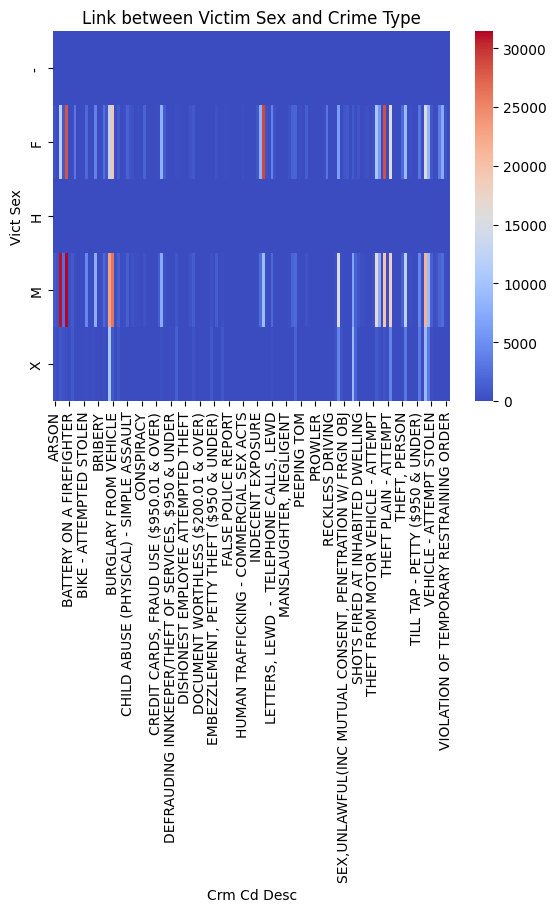

In [ ]:
# Simple analysis example without specific link data
victim_crime_link = pd.crosstab(Crime['Vict Sex'], Crime['Crm Cd Desc'])
sns.heatmap(victim_crime_link, annot=False, cmap='coolwarm')
plt.title('Link between Victim Sex and Crime Type')
plt.show()


<ipython-input-45-b665d376e2e6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Crime['Estimated Cost'] = Crime['Crm Cd Desc'].map(crime_costs)


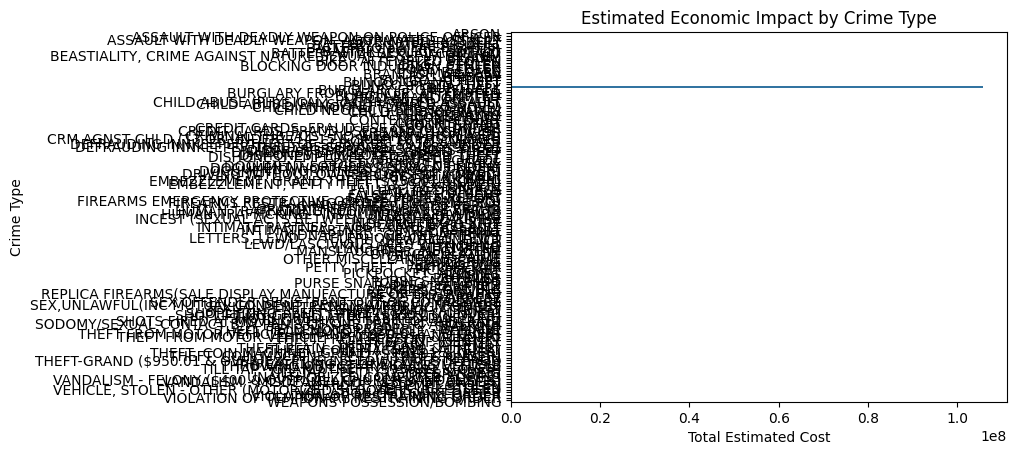

In [ ]:
# Assume some hypothetical average costs per crime type
crime_costs = {
    'BURGLARY': 2300,
    'THEFT': 500,
    # etc.
}

# Calculate total costs by crime type
Crime['Estimated Cost'] = Crime['Crm Cd Desc'].map(crime_costs)
total_cost_by_type = Crime.groupby('Crm Cd Desc')['Estimated Cost'].sum()

sns.barplot(x=total_cost_by_type.values, y=total_cost_by_type.index)
plt.title('Estimated Economic Impact by Crime Type')
plt.xlabel('Total Estimated Cost')
plt.ylabel('Crime Type')
plt.show()
